In [9]:
!pip install ultralytics

In [10]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/image1.jpg'

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 834, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 563, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 183, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen.send(None)
  File "/usr/local/lib/python

In [11]:
from ultralytics import YOLO
from PIL import Image

In [12]:
model = YOLO("yolov8m.pt")

In [14]:
img='/content/I-90-94_Entrance_at_Madison_Street,_Chicago_(14560285196).jpg'
img='/content/Screenshot 2023-08-07 154530.png'
results=model.predict(img)
results=model.predict(img)


image 1/1 /content/Screenshot 2023-08-07 154530.png: 640x640 1 person, 1 donut, 1 cake, 1697.9ms
Speed: 14.7ms preprocess, 1697.9ms inference, 33.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Screenshot 2023-08-07 154530.png: 640x640 1 person, 1 donut, 1 cake, 2171.3ms
Speed: 4.5ms preprocess, 2171.3ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


In [16]:
result=results[0]

In [17]:
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)


Object type: tensor([0.])
Coordinates: tensor([[  0.0000,   2.4322, 765.7702, 775.2350]])
Probability: tensor([0.8972])
Object type: tensor([0.])
Coordinates: tensor([[  0.0000,   2.4322, 765.7702, 775.2350]])
Probability: tensor([0.8972])


In [18]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(0.)
Coordinates: tensor([  0.0000,   2.4322, 765.7702, 775.2350])
Probability: tensor(0.8972)
Object type: tensor(0.)
Coordinates: tensor([  0.0000,   2.4322, 765.7702, 775.2350])
Probability: tensor(0.8972)


In [19]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [0.0, 2.4322054386138916, 765.7702026367188, 775.2349853515625]
Probability: 0.8971571922302246
Object type: 0.0
Coordinates: [0.0, 2.4322054386138916, 765.7702026367188, 775.2349853515625]
Probability: 0.8971571922302246


In [20]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: person
Coordinates: [0, 2, 766, 775]
Probability: 0.9
Object type: person
Coordinates: [0, 2, 766, 775]
Probability: 0.9


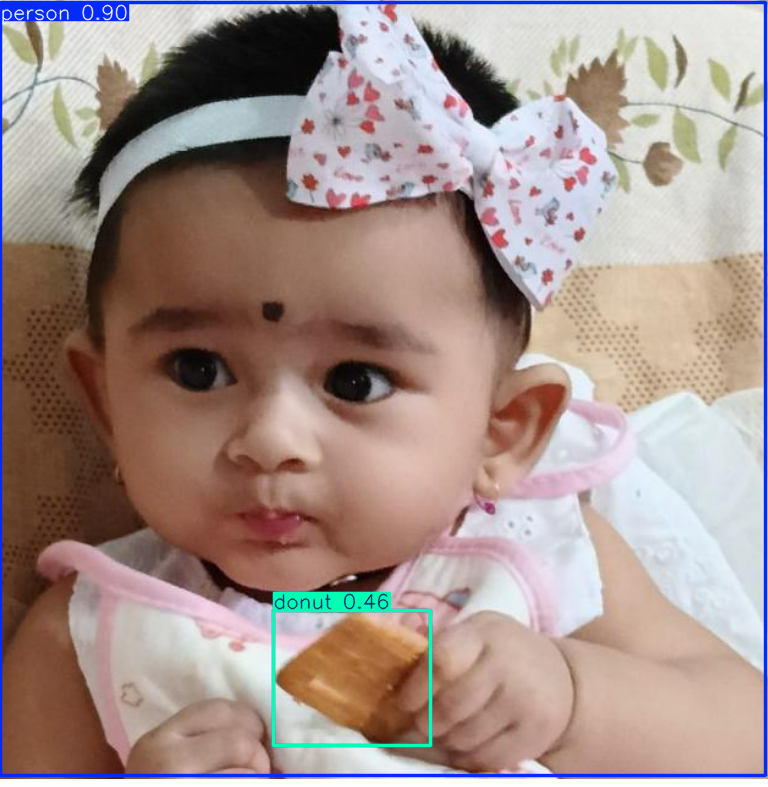

In [21]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])